In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# The data (X1, X2, X3) are for each patient
# X1 = systolic blood pressure
# X2 = age in years
# X3 = weight in pounds

In [5]:
df = pd.read_excel('systolic.xlsx')
X = df.as_matrix()
print(X)

[[132  52 173]
 [143  59 184]
 [153  67 194]
 [162  73 211]
 [154  64 196]
 [168  74 220]
 [137  54 188]
 [149  61 188]
 [159  65 207]
 [128  46 167]
 [166  72 217]]


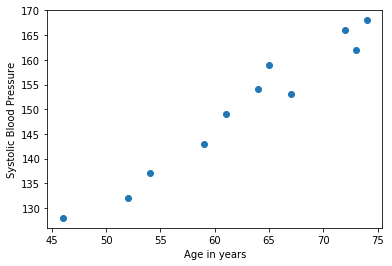

In [7]:
plt.scatter(X[:,1], X[:,0])
plt.xlabel('Age in years')
plt.ylabel('Systolic Blood Pressure')
plt.show()

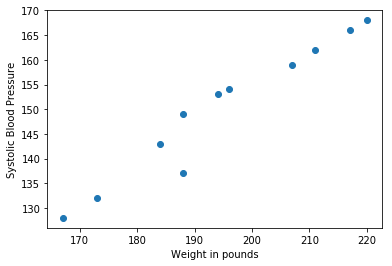

In [8]:
plt.scatter(X[:,2], X[:,0])
plt.xlabel('Weight in pounds')
plt.ylabel('Systolic Blood Pressure')
plt.show()

In [10]:
df['ones'] = 1 # acts as bias
Y = df['X1']
# We want to do 3 linear regressions, one with just age as input, one with just weight as input, and one with both
X = df[['X2', 'X3', 'ones']]
X2only = df[['X2', 'ones']]
X3only = df[['X3', 'ones']]

In [11]:
def get_r2(X, Y):
    w = np.linalg.solve( X.T.dot(X), X.T.dot(Y) )
    Yhat = X.dot(w)
    
    d1 = Y - Yhat
    d2 = Y - Y.mean()
    r2 = 1 - d1.dot(d1) / d2.dot(d2)
    return r2

In [12]:
print('r-squared for age only:', get_r2(X2only, Y))
print('r-squared for weight only:', get_r2(X3only, Y))
print('r-squared for both age and weight:', get_r2(X, Y))

r-squared for age only: 0.9578407208147355
r-squared for weight only: 0.9419952085293065
r-squared for both age and weight: 0.9768471041502091
